In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import binned_statistic
import pickle

%matplotlib inline

In [3]:
#load incomplete cleaned data
firex_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/firex_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
wecan_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/wecan_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
arctas_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/arctas_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
atom_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/atom_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
dc3_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/dc3_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
dc3_60s_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/dc3_60s_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_2084602/1209155759.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  atom_df_incomplete = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/incomplete/atom_final_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')


In [4]:
#load complete cleaned data (missing value treatment)
firex_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/firex_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
wecan_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/wecan_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
arctas_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/arctas_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
atom_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/atom_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
dc3_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/dc3_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
dc3_60s_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/dc3_60s_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_2084602/749090922.py:5: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  atom_df_clean = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/data/final/complete/atom_final_complete.csv', parse_dates=['timestamp'], index_col='timestamp')


In [5]:
# load updated
arctas_df_clean_new = pd.read_csv('../../data/gap_filled/arctas_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
firex_df_clean_new = pd.read_csv('../../data/gap_filled/firex_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
wecan_df_clean_new = pd.read_csv('../../data/gap_filled/wecan_complete.csv', parse_dates=['timestamp'], index_col='timestamp')
atom_df_clean_new = pd.read_csv('../../data/gap_filled/atom_complete.csv', parse_dates=['timestamp'], index_col='timestamp')

# load updated incomplete
arctas_df_incomplete_new = pd.read_csv('../../data/raw/arctas_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
firex_df_incomplete_new = pd.read_csv('../../data/raw/firex_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
wecan_df_incomplete_new = pd.read_csv('../../data/raw/wecan_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')
atom_df_incomplete_new = pd.read_csv('../../data/raw/atom_incomplete.csv', parse_dates=['timestamp'], index_col='timestamp')

In [6]:
# compare clean and clean_new with plots of O3 and CO
def compare_clean_and_clean_new(df_clean, df_clean_new):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    
    # O3
    ax.scatter(df_clean['CO'], df_clean['O3'], label='Clean', alpha=0.5)
    ax.scatter(df_clean_new['CO'], df_clean_new['O3'], label='Clean New', alpha=0.5)
    ax.set_ylabel('O3 (ppb)')
    ax.legend()

    plt.tight_layout()
    plt.show()


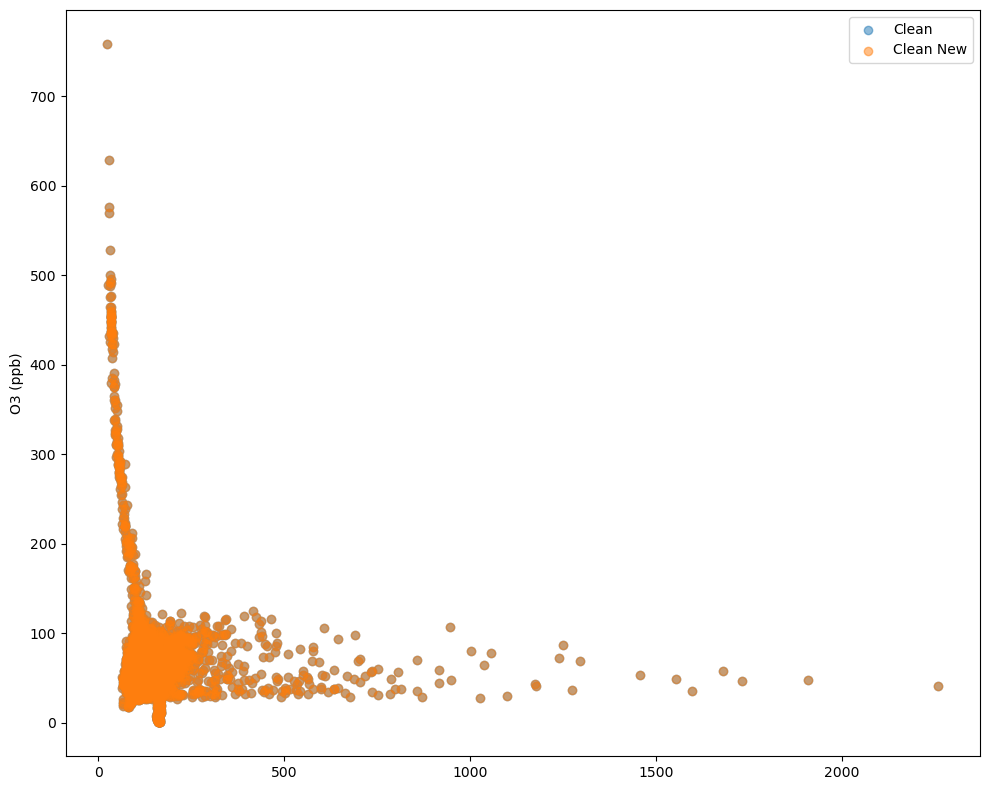

In [7]:
compare_clean_and_clean_new(arctas_df_incomplete, arctas_df_incomplete_new,)

In [8]:
firex_df_clean_new['temp']

timestamp
2019-07-22 18:18:29    26.3689
2019-07-22 18:20:28    23.3789
2019-07-22 18:22:28    21.5811
2019-07-22 18:24:29    11.4197
2019-07-22 18:26:29    11.2497
                        ...   
2019-09-05 23:01:22    15.3739
2019-09-05 23:03:07    18.4391
2019-09-05 23:04:53    25.5034
2019-09-05 23:06:37    27.7330
2019-09-05 23:08:23    31.0810
Name: temp, Length: 4542, dtype: float64

# Load Data

In [9]:
firex_measurements_df = pd.read_csv('/home/jpalmo/fs09/Projects/O3Fire/code/measurements/final_measurement_lists/final_firex_measurement_list.csv')

In [10]:
# df = pd.read_csv('../data/airborne_data.csv', parse_dates=['timestamp'], index_col='timestamp')
df = pd.read_csv('../../data/airborne_data_20241015.csv', parse_dates=['timestamp'], index_col='timestamp')
df1 = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_2084602/4218579341.py:2: DtypeWarning: Columns (140,196) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/airborne_data_20241015.csv', parse_dates=['timestamp'], index_col='timestamp')
/tmp/ipykernel_2084602/4218579341.py:3: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')


In [11]:
df['regime'].value_counts(), df1['regime'].value_counts()

(clean          7922
 fire           4042
 urban          3242
 none           1685
 heavy_mixed    1552
 light_mixed    1499
 Name: regime, dtype: int64,
 clean          7922
 fire           4002
 urban          3328
 none           1685
 light_mixed    1546
 heavy_mixed    1459
 Name: regime, dtype: int64)

In [12]:
dc3 = df[df['campaign'] == 'DC3']
dc31 = df1[df1['campaign'] == 'DC3']

ARCTAS - Original: 469, New: 645
ATom - Original: 435, New: 319
DC3 - Original: 116, New: 107
FIREX - Original: 1032, New: 952
WECAN - Original: 1990, New: 1979


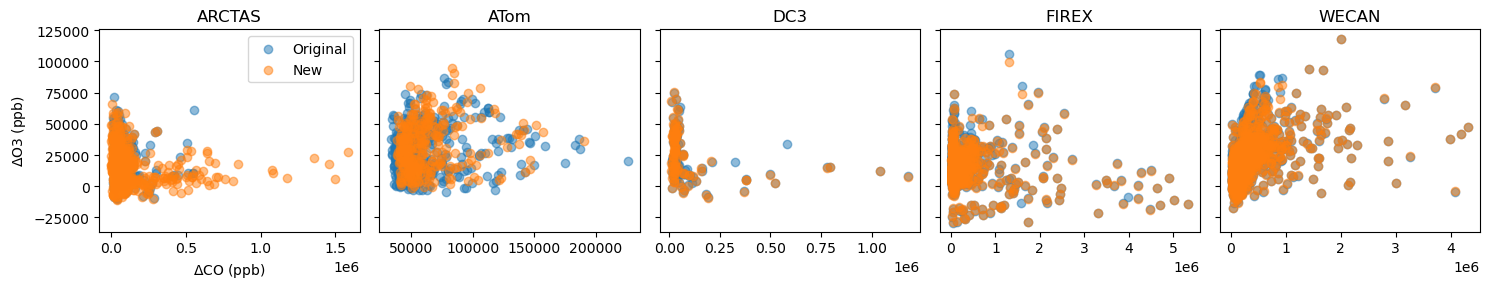

In [13]:
fig,axs = plt.subplots(1,5, figsize=(15, 3), sharey=True)
for i,c in enumerate(np.unique(df['campaign'])):
    tmp_orig = df[df['campaign'] == c]
    tmp_new = df1[df1['campaign'] == c]
    # fire regime only
    tmp_orig = tmp_orig[tmp_orig['regime'] == 'fire']
    tmp_new = tmp_new[tmp_new['regime'] == 'fire']

    ax = axs[i]
    ax.set_title(c)
    ax.scatter(tmp_orig['CO_delta'], tmp_orig['O3_delta'], color='tab:blue', label='Original', alpha=0.5)
    ax.scatter(tmp_new['CO_delta'], tmp_new['O3_delta'], color='tab:orange', label='New', alpha=0.5)

    # print the count of points in each dataset
    print(f"{c} - Original: {len(tmp_orig)}, New: {len(tmp_new)}")
    

axs[0].set_ylabel('$\Delta$O3 (ppb)')
axs[0].set_xlabel('$\Delta$CO (ppb)')
axs[0].legend()
plt.tight_layout()


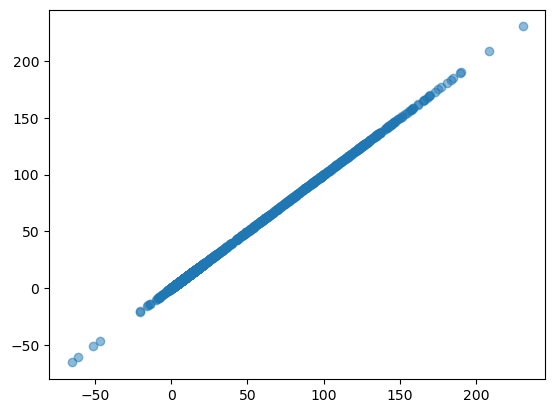

In [14]:
plt.scatter(df['age'], df1['age'], alpha=0.5)

In [15]:
dc3[dc3['regime'] == 'heavy_mixed']

,H2O2,O3,H2O,HCOOH,NO,NO2,HNO3,HNO2,HCN,CH3CN,...,Ox_delta,CO_delta,O3/CO,NOx_delta,CH3CN_delta,HCN_delta,C2Cl4_delta,CH2Cl2_delta,theta,age
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-05-18 19:08:30,754.298333,76455.86500,5.273364e+09,NaN,25.320000,NaN,373.623333,NaN,136.606667,280.466667,...,NaN,40777.613200,0.764092,NaN,156.280991,-34.162083,2.234,0.8,0.046807,NaN
2012-05-18 19:09:30,774.675000,77109.69833,5.189580e+09,NaN,23.378333,NaN,315.393333,NaN,152.183333,264.032258,...,NaN,48307.761870,0.658448,NaN,133.437981,-16.459667,2.274,-2.2,0.042418,NaN
2012-05-18 19:11:30,752.700000,78952.41667,4.380473e+09,NaN,17.763333,NaN,260.233333,NaN,153.081667,244.433333,...,NaN,51049.309970,0.659183,NaN,113.839056,-15.561333,2.375,-8.8,0.031612,NaN
2012-05-18 19:14:30,733.413333,77947.46000,4.739520e+09,NaN,14.140000,NaN,220.321667,NaN,150.733333,222.333333,...,NaN,49149.261870,0.664220,NaN,91.739057,-17.909667,2.040,-7.4,0.025547,NaN
2012-05-18 19:18:30,671.245000,76864.12000,3.711400e+09,NaN,NaN,NaN,181.663333,NaN,135.215000,213.000000,...,NaN,48271.428570,0.653856,NaN,82.405723,-33.428000,2.533,-4.6,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-23 00:39:30,311.226667,67721.31667,2.811730e+08,NaN,715.298333,593.480000,25.500000,NaN,418.845000,188.333333,...,9042.370000,33067.244632,0.260743,1092.836345,59.000000,184.531667,1.138,2.8,2.301897,NaN
2012-06-23 00:40:30,257.838333,68325.43833,2.866715e+08,NaN,745.831667,476.266667,16.238333,NaN,432.885000,189.666667,...,9529.278327,34043.583332,0.271011,1006.156345,60.333333,198.571667,1.138,2.8,2.169261,NaN
2012-06-23 00:53:30,370.540000,73433.60667,3.937648e+08,NaN,1221.050000,957.250000,25.908333,NaN,722.668333,276.000000,...,15118.430000,62654.083332,0.228785,1962.358011,146.666667,488.355000,1.183,3.2,3.079441,NaN


In [16]:
dc31[dc31['regime'] == 'heavy_mixed']

,lat,long,altitude,jNO2,jO3,pressure,temperature,wind_speed,wind_direction,OA_AMS,...,CH3CN_delta,HCN_delta,C2Cl4_delta,CH2Cl2_delta,age_phenol_benzene,age_furan_benzene,age_toluene_benzene,age,pressure_atm,theta
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-05-18 19:08:30,38.818141,262.003807,3712.941667,0.011173,4.888065e-05,647.101867,278.024994,11.608308,236.172616,NaN,...,152.371967,-33.902708,2.23650,1.800,NaN,NaN,73.147077,NaN,0.638640,0.046807
2012-05-18 19:09:30,38.839394,261.897667,4191.643333,0.011390,5.048609e-05,610.110367,273.695827,12.062455,238.775091,NaN,...,132.545679,-14.758842,2.27400,-1.500,NaN,NaN,NaN,NaN,0.602132,0.042418
2012-05-18 19:11:30,38.889504,261.653947,4449.031333,0.011534,5.126591e-05,590.490583,271.537494,12.954513,237.689038,5.444536,...,112.946754,-13.860508,2.37500,-8.100,NaN,NaN,25.150319,NaN,0.582769,0.031612
2012-05-18 19:14:30,38.967785,261.271167,4434.859167,0.011562,5.129696e-05,591.303833,271.449994,12.826402,244.131361,5.026214,...,90.846754,-16.208842,2.04000,-6.700,NaN,NaN,-35.393243,NaN,0.583572,0.025547
2012-05-18 19:18:30,39.073000,260.744627,4449.125167,0.011378,5.076835e-05,589.819417,271.649994,10.477222,249.764545,3.339867,...,81.513421,-31.727175,2.53300,-3.900,NaN,NaN,78.921558,NaN,0.582107,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-23 00:54:30,41.076000,257.803189,10543.968330,0.002482,1.176913e-06,261.978867,230.766661,25.103344,272.881060,7.150097,...,151.666667,537.469433,1.09375,2.625,NaN,NaN,7.674100,NaN,0.258553,2.527719
2012-06-23 00:55:30,41.184299,257.739845,10545.916670,0.001506,6.263899e-07,261.763550,229.870827,23.919613,258.483184,9.528034,...,165.666667,587.779998,1.09375,2.625,NaN,NaN,27.297335,NaN,0.258341,2.934835
2012-06-23 01:07:30,41.273526,258.010618,10852.661670,0.002057,7.966573e-07,249.849617,227.399994,30.744925,249.073476,11.284274,...,226.666667,681.604433,0.84075,0.325,NaN,NaN,26.581029,NaN,0.246582,3.019811


In [17]:
df[df['campaign'] == 'DC3']['age'].isna().sum(), df1[df1['campaign'] == 'DC3']['age'].isna().sum()

(5374, 5385)

In [18]:
df[df['campaign'] == 'DC3']['NOx']

timestamp
2012-05-18 19:03:30            NaN
2012-05-18 19:04:30            NaN
2012-05-18 19:05:30            NaN
2012-05-18 19:06:30            NaN
2012-05-18 19:07:30            NaN
                          ...     
2012-06-23 02:47:30     368.621095
2012-06-23 02:48:30     312.855263
2012-06-23 02:49:30     328.573333
2012-06-23 02:50:30     320.463333
2012-06-23 02:51:30    1208.688384
Name: NOx, Length: 5467, dtype: float64

In [19]:
df1[df1['campaign'] == 'DC3']['NOx']

timestamp
2012-05-18 19:03:30            NaN
2012-05-18 19:04:30            NaN
2012-05-18 19:05:30            NaN
2012-05-18 19:06:30            NaN
2012-05-18 19:07:30            NaN
                          ...     
2012-06-23 02:47:30     368.621095
2012-06-23 02:48:30     312.855263
2012-06-23 02:49:30     328.573333
2012-06-23 02:50:30     320.463333
2012-06-23 02:51:30    1208.688384
Name: NOx, Length: 5467, dtype: float64

In [20]:
np.nanmedian(df[df['campaign'] == 'DC3']['age']),  np.nanmedian(df1[df1['campaign'] == 'DC3']['age'])

(31.453865640708354, 39.383254321453194)

In [21]:
(5467 - 5374), (2764-2745)

(93, 19)

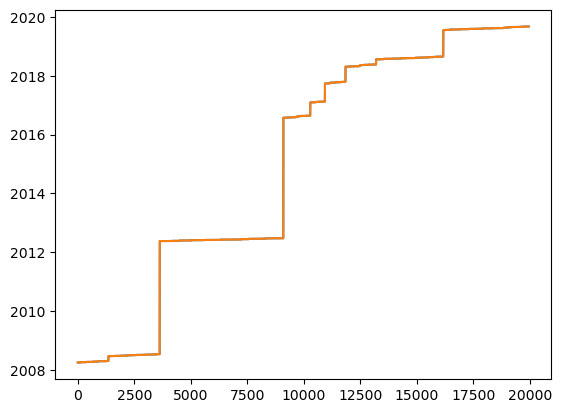

In [22]:
plt.plot(df.index)
plt.plot(df1.index)

[Text(1, 0, '1'),
 Text(10, 0, '10'),
 Text(20, 0, '20'),
 Text(50, 0, '50'),
 Text(100, 0, '100'),
 Text(200, 0, '200')]

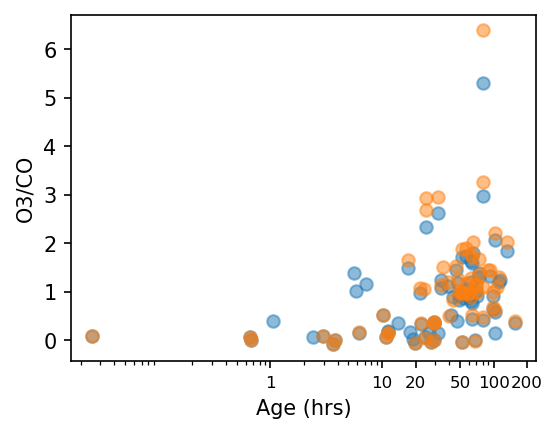

In [23]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.scatter(dc3['age'], dc3['O3/CO'], alpha=0.5)
ax.scatter(dc31['age'], dc31['O3/CO'], alpha=0.5)
# plot points from ATom and ARCTAS also
# ax.scatter(df[df['campaign'] == 'ATom']['age'], df[df['campaign'] == 'ATom']['O3/CO'], alpha=0.5)
# ax.scatter(df[df['campaign'] == 'ARCTAS']['age'], df[df['campaign'] == 'ARCTAS']['O3/CO'], alpha=0.5)
ax.set_xlabel('Age (hrs)')
ax.set_ylabel('O3/CO')
ax.set_xscale('log')
ax.set_xticks([1, 10, 20, 50, 100, 200])
ax.set_xticklabels([1, 10, 20, 50, 100, 200], fontsize=8)

In [24]:
np.nanmedian(df1['theta'])

0.11395562198977474

In [25]:
np.nanmedian(df['theta'])

0.1139556219897743

In [26]:
jw_df = pd.read_csv('../../data/figure01_JW_table1.csv',)
jw_df['age'] = (jw_df['plume_age_lower']+jw_df['plume_age_upper'])/2
jw_df['N'] = jw_df['N'].replace(np.nan, 1)

In [27]:
df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')

/tmp/ipykernel_2084602/4140673560.py:1: DtypeWarning: Columns (195) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/processed/complete_data.csv', parse_dates=['timestamp'], index_col='timestamp')


In [28]:
# df = df[df['campaign'] != 'DC3']

# Plot

/tmp/ipykernel_2084602/205647003.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['age_bin'] = pd.cut(fire['age'], bins=log_bins)


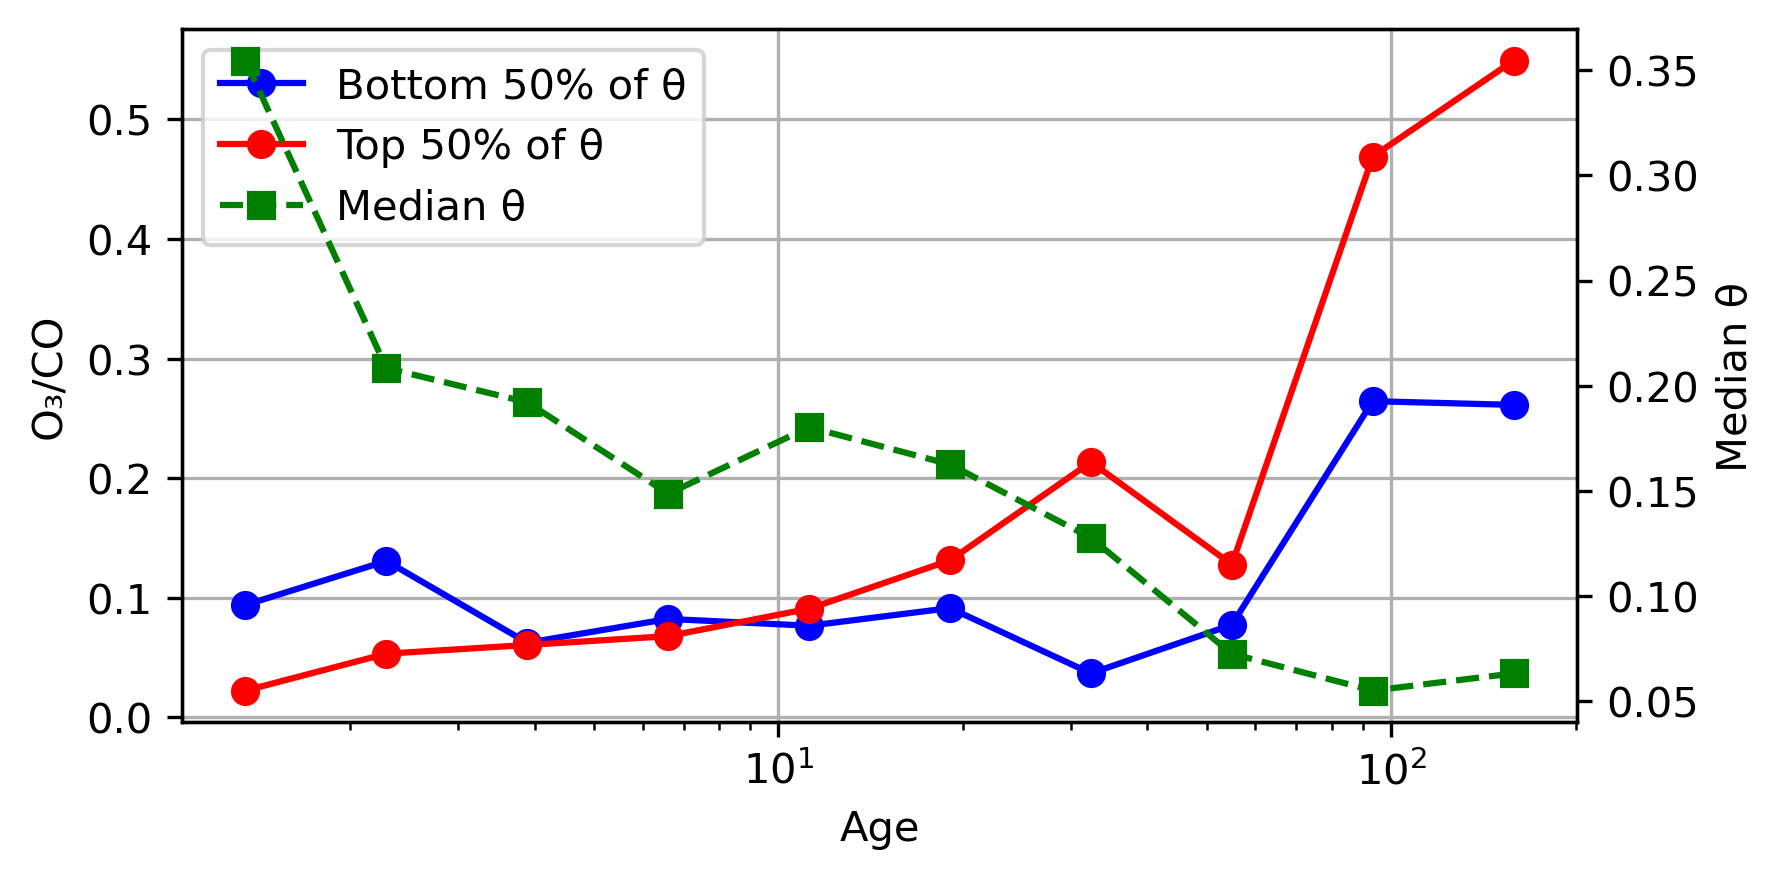

In [29]:
split_by = 'theta'
y_var = 'O3/CO'

tmp = df#[(df['O3/CO']>0)]

fire = tmp[(tmp['regime'] == 'fire')]

fig, ax1 = plt.subplots(figsize=(6, 3), dpi=300)
log_bins = np.logspace(-0, 2.3, 11)
bin_centers = log_bins[:-1] + np.diff(log_bins)/2

bottom_medians = []
top_medians = []
median_theta = []
bin_counts = []

# Bin the data by age
fire['age_bin'] = pd.cut(fire['age'], bins=log_bins)

for bin_label, bin_group in fire.groupby('age_bin'):
    if len(bin_group) < 2:
        bottom_medians.append(np.nan)
        top_medians.append(np.nan)
        median_theta.append(np.nan)
        bin_counts.append(0)
        continue

    theta_med = np.nanpercentile(bin_group[split_by], 50)
    median_theta.append(theta_med)
    
    bottom = bin_group[bin_group[split_by] <= theta_med]
    top = bin_group[bin_group[split_by] > theta_med]

    bottom_medians.append(np.nanmedian(bottom[y_var]) if not bottom.empty else np.nan)
    top_medians.append(np.nanmedian(top[y_var]) if not top.empty else np.nan)
    bin_counts.append(len(bin_group))

# Plot O3/CO medians
ax1.plot(bin_centers, bottom_medians, 'o-', label='Bottom 50% of θ', color='blue')
ax1.plot(bin_centers, top_medians, 'o-', label='Top 50% of θ', color='red')
ax1.set_xscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('O₃/CO')
ax1.grid(True)

# Second y-axis for theta
ax2 = ax1.twinx()
ax2.plot(bin_centers, median_theta, 's--', color='green', label='Median θ')
ax2.set_ylabel('Median θ')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')


/tmp/ipykernel_2084602/1199156888.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['age_bin'] = pd.cut(fire['age'], bins=log_bins)


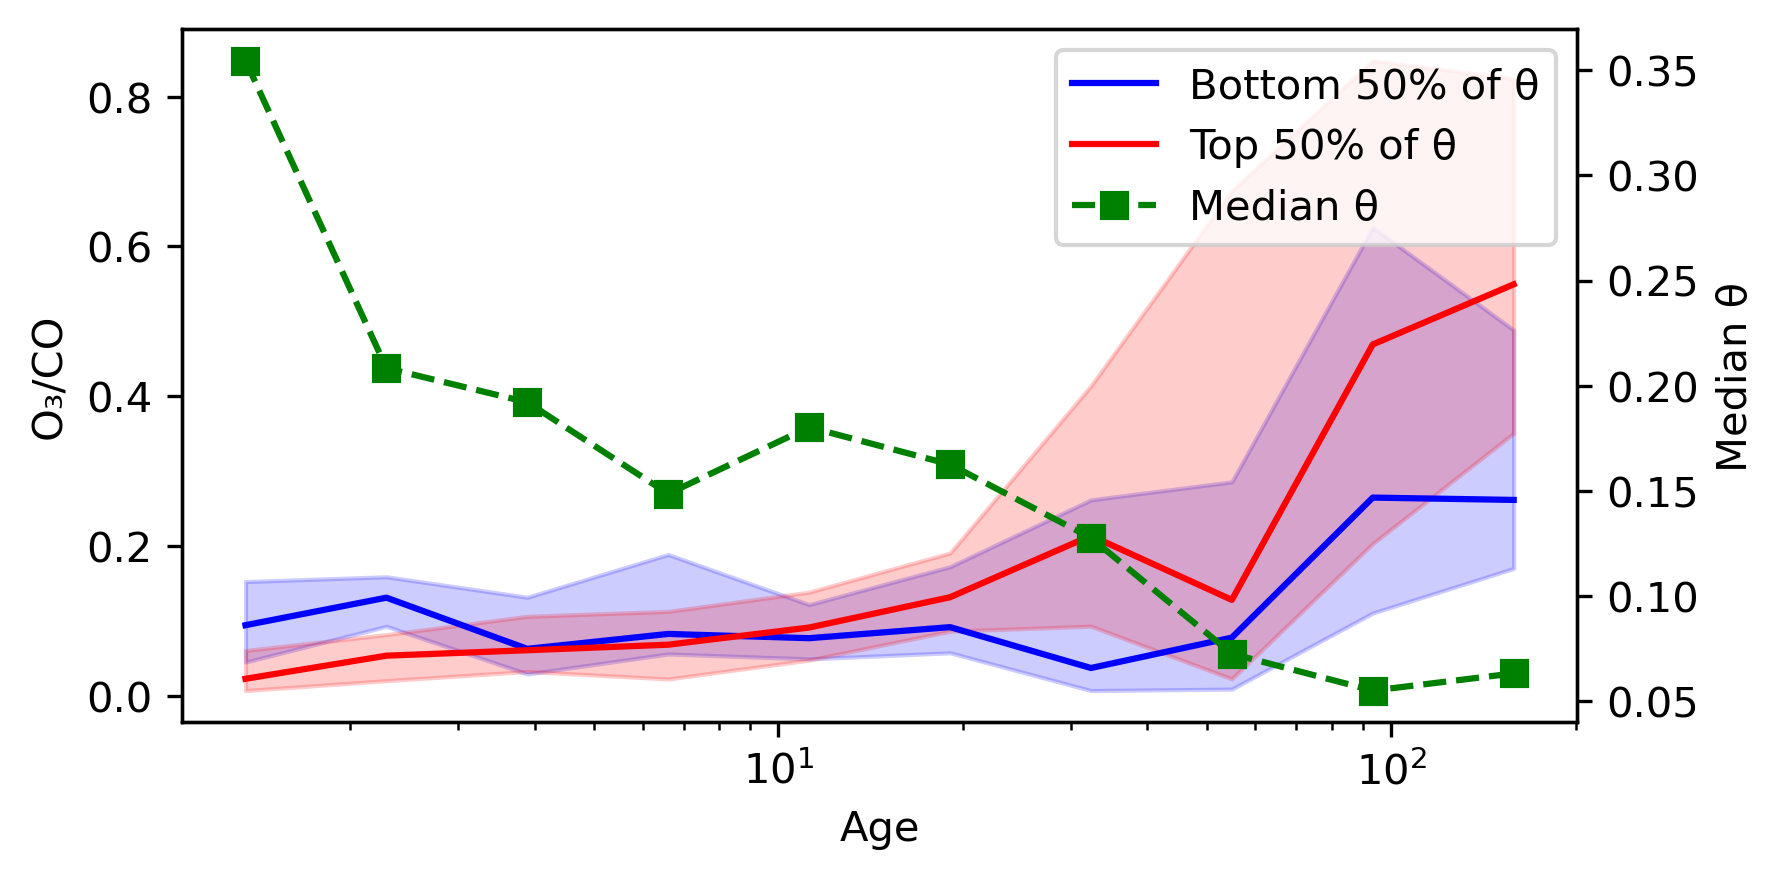

In [30]:
fig, ax1 = plt.subplots(figsize=(6, 3), dpi=300)
log_bins = np.logspace(-0, 2.3, 11)
bin_centers = log_bins[:-1] + np.diff(log_bins)/2

bottom_medians = []
top_medians = []
bottom_16 = []
bottom_84 = []
top_16 = []
top_84 = []
median_theta = []
bin_counts = []

# Bin the data by age
fire['age_bin'] = pd.cut(fire['age'], bins=log_bins)

for bin_label, bin_group in fire.groupby('age_bin'):
    if len(bin_group) < 2:
        bottom_medians.append(np.nan)
        top_medians.append(np.nan)
        bottom_16.append(np.nan)
        bottom_84.append(np.nan)
        top_16.append(np.nan)
        top_84.append(np.nan)
        median_theta.append(np.nan)
        bin_counts.append(0)
        continue

    theta_med = np.nanpercentile(bin_group[split_by], 50)
    median_theta.append(theta_med)
    
    bottom = bin_group[bin_group[split_by] <= theta_med]
    top = bin_group[bin_group[split_by] > theta_med]

    # Bottom group
    bottom_medians.append(np.nanmedian(bottom[y_var]) if not bottom.empty else np.nan)
    bottom_16.append(np.nanpercentile(bottom[y_var], 25) if not bottom.empty else np.nan)
    bottom_84.append(np.nanpercentile(bottom[y_var], 75) if not bottom.empty else np.nan)

    # Top group
    top_medians.append(np.nanmedian(top[y_var]) if not top.empty else np.nan)
    top_16.append(np.nanpercentile(top[y_var], 25) if not top.empty else np.nan)
    top_84.append(np.nanpercentile(top[y_var], 75) if not top.empty else np.nan)

    bin_counts.append(len(bin_group))

# Plot O3/CO medians
ax1.plot(bin_centers, bottom_medians, '-', label='Bottom 50% of θ', color='blue')
ax1.plot(bin_centers, top_medians, '-', label='Top 50% of θ', color='red')

# Shading for uncertainty (16th–84th percentile)
ax1.fill_between(bin_centers, bottom_16, bottom_84, color='blue', alpha=0.2)
ax1.fill_between(bin_centers, top_16, top_84, color='red', alpha=0.2)

ax1.set_xscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('O₃/CO')
# ax1.grid(True)

# Second y-axis for theta
ax2 = ax1.twinx()
ax2.plot(bin_centers, median_theta, 's--', color='green', label='Median θ')
ax2.set_ylabel('Median θ')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

from matplotlib.transforms import blended_transform_factory

campaigns = fire['campaign'].unique()

for i, bin_label in enumerate(fire['age_bin'].cat.categories):
    bin_group = fire[fire['age_bin'] == bin_label]
    if bin_group.empty:
        continue

    campaign_counts = bin_group['campaign'].value_counts().reindex(campaigns, fill_value=0)
    sizes = campaign_counts.values
    if sizes.sum() == 0:
        continue

    x = bin_centers[i]
    y = np.nanmax([top_84[i], bottom_84[i]]) * 1.05  # place pies just above the shaded region

    # Create inset axes located at (x, y) in data coordinates
    inset_ax = ax1.inset_axes([0, 0, 0.1, 0.1], transform=ax1.transData)
    inset_ax.set_position(ax1.transData.transform_bbox(ax1.bbox))  # to initialize with something safe

    # Size of pie chart in data units (tweak these)
    pie_width = 10  # in age units
    pie_height = 0.05  # in O3/CO units

    inset_ax.set_position([x - pie_width/2, y - pie_height/2, pie_width, pie_height])
    inset_ax.pie(sizes, labels=None, startangle=90)
    inset_ax.set_aspect('equal')
    inset_ax.axis('off')


/tmp/ipykernel_2084602/1138046871.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire['age_bin'] = pd.cut(fire['age'], bins=log_bins)


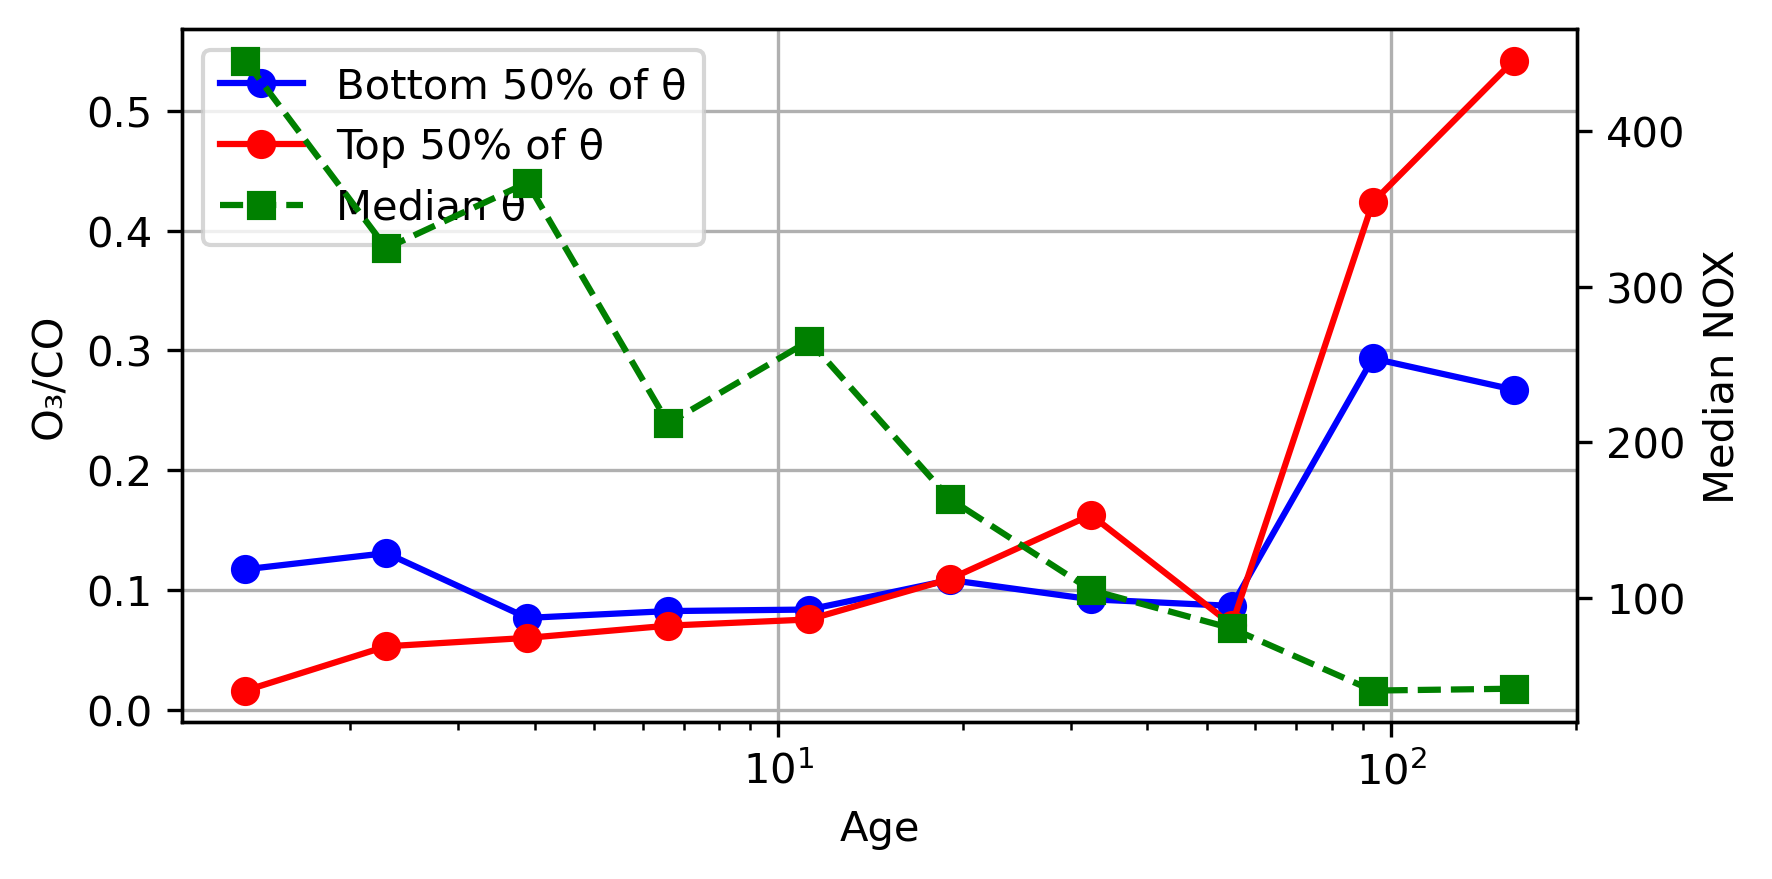

In [31]:
split_by = 'NOx'
y_var = 'O3/CO'

tmp = df  # if needed: tmp = df[df[y_var] > 0]
fire = tmp[tmp['regime'] == 'fire']

fig, ax1 = plt.subplots(figsize=(6, 3), dpi=300)
log_bins = np.logspace(-0, 2.3, 11)
bin_centers = log_bins[:-1] + np.diff(log_bins)/2

bottom_medians = []
top_medians = []
median_theta = []
bin_counts = []

# Bin the data by age
fire['age_bin'] = pd.cut(fire['age'], bins=log_bins)

for bin_label, bin_group in fire.groupby('age_bin'):
    if len(bin_group) < 2:
        bottom_medians.append(np.nan)
        top_medians.append(np.nan)
        median_theta.append(np.nan)
        bin_counts.append(0)
        continue

    theta_med = np.nanpercentile(bin_group[split_by], 50)
    median_theta.append(theta_med)
    
    bottom = bin_group[bin_group[split_by] <= theta_med]
    top = bin_group[bin_group[split_by] > theta_med]

    bottom_medians.append(np.nanmedian(bottom[y_var]) if not bottom.empty else np.nan)
    top_medians.append(np.nanmedian(top[y_var]) if not top.empty else np.nan)
    bin_counts.append(len(bin_group))

# Plot O3/CO medians
ax1.plot(bin_centers, bottom_medians, 'o-', label='Bottom 50% of θ', color='blue')
ax1.plot(bin_centers, top_medians, 'o-', label='Top 50% of θ', color='red')
ax1.set_xscale('log')
ax1.set_xlabel('Age')
ax1.set_ylabel('O₃/CO')
ax1.grid(True)

# Second y-axis for theta
ax2 = ax1.twinx()
ax2.plot(bin_centers, median_theta, 's--', color='green', label='Median θ')
ax2.set_ylabel('Median NOX')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')


In [32]:
fire['age_bin'].value_counts().sort_index()

(1.0, 1.698]           45
(1.698, 2.884]         76
(2.884, 4.898]        192
(4.898, 8.318]        586
(8.318, 14.125]      1061
(14.125, 23.988]      498
(23.988, 40.738]      165
(40.738, 69.183]      217
(69.183, 117.49]      302
(117.49, 199.526]     178
Name: age_bin, dtype: int64

In [33]:
# groupby age_bin and print the value_counts for campaign in each bin
for bin_label, bin_group in fire.groupby('age_bin'):
    print(bin_label)
    print(bin_group['campaign'].value_counts())
    print()

(1.0, 1.698]
WECAN    44
FIREX     1
Name: campaign, dtype: int64

(1.698, 2.884]
WECAN     74
ARCTAS     1
FIREX      1
Name: campaign, dtype: int64

(2.884, 4.898]
WECAN     187
DC3         3
ARCTAS      2
Name: campaign, dtype: int64

(4.898, 8.318]
WECAN     536
FIREX      45
ARCTAS      4
DC3         1
Name: campaign, dtype: int64

(8.318, 14.125]
WECAN     658
FIREX     392
ARCTAS      7
DC3         4
Name: campaign, dtype: int64

(14.125, 23.988]
FIREX     314
WECAN     152
ARCTAS     28
DC3         4
Name: campaign, dtype: int64

(23.988, 40.738]
ARCTAS    85
FIREX     61
DC3       14
ATom       4
WECAN      1
Name: campaign, dtype: int64

(40.738, 69.183]
ARCTAS    182
DC3        20
ATom        9
FIREX       6
Name: campaign, dtype: int64

(69.183, 117.49]
ARCTAS    219
ATom       66
DC3        17
Name: campaign, dtype: int64

(117.49, 199.526]
ATom      106
ARCTAS     70
DC3         2
Name: campaign, dtype: int64

